# **Power Outage Insights: Feature Engineering in Time Series Analysis**

In [1]:
import pandas as pd

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

##Reading Outage and Weather Datasets

In [2]:
# reading eaglei power outage data files from 2018 to 2022

d2018 = pd.read_csv('/content/eaglei_outages_2018.csv')
d2018f = d2018[(d2018['state'] == 'Florida') & (d2018['county'] == 'Lee')]

d2019 = pd.read_csv('/content/eaglei_outages_2019.csv')
d2019f = d2019[(d2019['state'] == 'Florida') & (d2019['county'] == 'Lee')]

d2020 = pd.read_csv('/content/eaglei_outages_2020.csv')
d2020f = d2020[(d2020['state'] == 'Florida') & (d2020['county'] == 'Lee')]

d2021 = pd.read_csv('/content/eaglei_outages_2021.csv')
d2021f = d2021[(d2021['state'] == 'Florida') & (d2021['county'] == 'Lee')]

d2022 = pd.read_csv('/content/eaglei_outages_2022.csv')
d2022f = d2022[(d2022['state'] == 'Florida') & (d2022['county'] == 'Lee')]

In [3]:
# reading weather dataset

df2 = pd.read_csv('WeatherEvents_Jan2016-Dec2022.csv')
df2 = df2.reset_index(drop=True)

# filtering out for specific county and state
Wdf = df2[(df2['State'] == 'FL') & (df2['County'] == 'Lee')]
Wdf = Wdf.reset_index(drop=True)


In [4]:
Wdf

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-301709,Fog,Severe,2016-01-01 09:16:00,2016-01-01 09:49:00,0.00,US/Eastern,KRSW,26.5381,-81.7567,Fort Myers,Lee,FL,33913.0
1,W-301710,Fog,Severe,2016-01-01 10:38:00,2016-01-01 10:53:00,0.00,US/Eastern,KRSW,26.5381,-81.7567,Fort Myers,Lee,FL,33913.0
2,W-301711,Fog,Severe,2016-01-01 11:03:00,2016-01-01 11:15:00,0.00,US/Eastern,KRSW,26.5381,-81.7567,Fort Myers,Lee,FL,33913.0
3,W-301712,Fog,Severe,2016-01-01 11:53:00,2016-01-01 12:18:00,0.00,US/Eastern,KRSW,26.5381,-81.7567,Fort Myers,Lee,FL,33913.0
4,W-301713,Fog,Severe,2016-01-02 04:59:00,2016-01-02 09:31:00,0.00,US/Eastern,KRSW,26.5381,-81.7567,Fort Myers,Lee,FL,33913.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8033,W-3480571,Rain,Light,2022-12-23 09:26:00,2022-12-23 09:33:00,0.01,US/Eastern,KFMY,26.5849,-81.8615,Fort Myers,Lee,FL,33907.0
8034,W-3480572,Fog,Severe,2022-12-31 07:13:00,2022-12-31 07:42:00,0.00,US/Eastern,KFMY,26.5849,-81.8615,Fort Myers,Lee,FL,33907.0
8035,W-3480573,Fog,Severe,2022-12-31 07:46:00,2022-12-31 08:09:00,0.00,US/Eastern,KFMY,26.5849,-81.8615,Fort Myers,Lee,FL,33907.0
8036,W-3480574,Fog,Severe,2022-12-31 08:16:00,2022-12-31 08:38:00,0.00,US/Eastern,KFMY,26.5849,-81.8615,Fort Myers,Lee,FL,33907.0


In [5]:
# combining all years datasets
combined_df = pd.concat([d2018f, d2019f, d2020f, d2021f, d2022f], ignore_index=True)
combined_df

,fips_code,county,state,sum,run_start_time
0,12071,Lee,Florida,1.0,2018-01-01 01:15:00
1,12071,Lee,Florida,1.0,2018-01-01 01:30:00
2,12071,Lee,Florida,1.0,2018-01-01 01:45:00
3,12071,Lee,Florida,1.0,2018-01-01 02:00:00
4,12071,Lee,Florida,1.0,2018-01-01 02:15:00
...,...,...,...,...,...
64145,12071,Lee,Florida,68.0,2022-06-07 09:00:00
64146,12071,Lee,Florida,68.0,2022-06-07 09:15:00
64147,12071,Lee,Florida,68.0,2022-06-07 09:30:00
64148,12071,Lee,Florida,68.0,2022-06-07 09:45:00


## Exploratory Data Analysis

###Data Preprocessing of outage dataset

In [6]:
# Dropping the 'fips_code' column
df = combined_df.drop(columns=['fips_code'])

# Converting 'run_start_time' to datetime
df['run_start_time'] = pd.to_datetime(df['run_start_time'])

# Splitting 'run_start_time' into separate 'date' and 'time' columns
df['date'] = df['run_start_time'].dt.date
df['time'] = df['run_start_time'].dt.time

# Dropping the original 'run_start_time'
df = df.drop(columns=['run_start_time'])

# Displaying the modified dataframe
df

,county,state,sum,date,time
0,Lee,Florida,1.0,2018-01-01,01:15:00
1,Lee,Florida,1.0,2018-01-01,01:30:00
2,Lee,Florida,1.0,2018-01-01,01:45:00
3,Lee,Florida,1.0,2018-01-01,02:00:00
4,Lee,Florida,1.0,2018-01-01,02:15:00
...,...,...,...,...,...
64145,Lee,Florida,68.0,2022-06-07,09:00:00
64146,Lee,Florida,68.0,2022-06-07,09:15:00
64147,Lee,Florida,68.0,2022-06-07,09:30:00
64148,Lee,Florida,68.0,2022-06-07,09:45:00


In [7]:
# grouping by data and taking maximum of the outage 'sum' per each day
df_grouped = df.groupby('date').agg({'sum': 'max'}).reset_index()

# Adding back the 'county' and 'state' columns from the original DataFrame
df_grouped['county'] = df.iloc[0]['county']
df_grouped['state'] = df.iloc[0]['state']

# Reordering columns
df_grouped = df_grouped[['county', 'state', 'sum', 'date']]

# Displaying the modified DataFrame
df_grouped

,county,state,sum,date
0,Lee,Florida,19.0,2018-01-01
1,Lee,Florida,86.0,2018-01-02
2,Lee,Florida,3443.0,2018-01-03
3,Lee,Florida,531.0,2018-01-04
4,Lee,Florida,137.0,2018-01-05
...,...,...,...,...
824,Lee,Florida,9328.0,2022-06-03
825,Lee,Florida,7579.0,2022-06-04
826,Lee,Florida,331.0,2022-06-05
827,Lee,Florida,3046.0,2022-06-06


In [8]:
# adding complete data range to the dataset and filling zeros for missing dates

df = df_grouped

# Converting 'date' into datetime format
df['date'] = pd.to_datetime(df['date'])

# Creating a date range from 2018 to 2022
date_range = pd.date_range(start='2018-01-01', end='2022-12-31')

# Creating a new DataFrame with the complete date range
df_full_date_range = pd.DataFrame({'date': date_range})

# Merging the original DataFrame with the full date range DataFrame
df_merged_outage = pd.merge(df_full_date_range, df, on='date', how='left')

# Filling in missing values for 'county', 'state', and 'sum'
df_merged_outage['county'] = df_merged_outage['county'].fillna('Lee')
df_merged_outage['state'] = df_merged_outage['state'].fillna('Florida')
df_merged_outage['sum'] = df_merged_outage['sum'].fillna(0)

df_merged_outage

,date,county,state,sum
0,2018-01-01,Lee,Florida,19.0
1,2018-01-02,Lee,Florida,86.0
2,2018-01-03,Lee,Florida,3443.0
3,2018-01-04,Lee,Florida,531.0
4,2018-01-05,Lee,Florida,137.0
...,...,...,...,...
1821,2022-12-27,Lee,Florida,0.0
1822,2022-12-28,Lee,Florida,0.0
1823,2022-12-29,Lee,Florida,0.0
1824,2022-12-30,Lee,Florida,0.0


###Data Preprocessing of weather dataset

In [9]:
# dropping the irrelevant columns
columns_to_drop = [
    'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
    'LocationLng', 'City', 'ZipCode', 'EventId', 'County', 'State'
]
df = Wdf.drop(columns=columns_to_drop)

# localizing the date format
df['StartTime(UTC)'] = pd.to_datetime(df['StartTime(UTC)']).dt.tz_localize('UTC').dt.tz_convert('US/Central')
df['EndTime(UTC)'] = pd.to_datetime(df['EndTime(UTC)']).dt.tz_localize('UTC').dt.tz_convert('US/Central')

# coverting datetime to date format
df['Date'] = df['StartTime(UTC)'].dt.date
df['EndDate'] = df['EndTime(UTC)'].dt.date

# dropping datatime format columns
df = df.drop(columns=['StartTime(UTC)', 'EndTime(UTC)', 'EndDate'])
df

,Type,Severity,Date
0,Fog,Severe,2016-01-01
1,Fog,Severe,2016-01-01
2,Fog,Severe,2016-01-01
3,Fog,Severe,2016-01-01
4,Fog,Severe,2016-01-01
...,...,...,...
8033,Rain,Light,2022-12-23
8034,Fog,Severe,2022-12-31
8035,Fog,Severe,2022-12-31
8036,Fog,Severe,2022-12-31


In [10]:
# dropping rows of years 2016 and 2017 from weather dataset as outage data is from 2018 to 2022
df['Date'] = pd.to_datetime(df['Date'])
df3 = df[~df['Date'].dt.year.isin([2016, 2017])]
df3

,Type,Severity,Date
1429,Rain,Light,2018-01-01
1430,Rain,Light,2018-01-01
1431,Rain,Light,2018-01-03
1432,Rain,Light,2018-01-03
1433,Rain,Light,2018-01-07
...,...,...,...
8033,Rain,Light,2022-12-23
8034,Fog,Severe,2022-12-31
8035,Fog,Severe,2022-12-31
8036,Fog,Severe,2022-12-31


In [11]:
# getting unique event types
unique_types = df3['Type'].unique()
unique_type_count = len(unique_types)
unique_type_count, unique_types

(6,
 array(['Rain', 'Fog', 'Cold', 'Precipitation', 'Storm', 'Hail'],
       dtype=object))

In [12]:
# mapping severity categorical values into unique numeric values based on priority
severity_mapping = {'Light': 1, 'Moderate': 2, 'Severe': 3, 'Heavy': 4, 'UNK': 5, 'Other': 6}

# Creating new columns for each unique 'Type'
for type_entry in unique_types:
    df3[type_entry] = df3.apply(
        lambda x: severity_mapping[x['Severity']] if x['Type'] == type_entry else 0, axis=1
    )
df3

,Type,Severity,Date,Rain,Fog,Cold,Precipitation,Storm,Hail
1429,Rain,Light,2018-01-01,1,0,0,0,0,0
1430,Rain,Light,2018-01-01,1,0,0,0,0,0
1431,Rain,Light,2018-01-03,1,0,0,0,0,0
1432,Rain,Light,2018-01-03,1,0,0,0,0,0
1433,Rain,Light,2018-01-07,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8033,Rain,Light,2022-12-23,1,0,0,0,0,0
8034,Fog,Severe,2022-12-31,0,3,0,0,0,0
8035,Fog,Severe,2022-12-31,0,3,0,0,0,0
8036,Fog,Severe,2022-12-31,0,3,0,0,0,0


In [13]:
# selecting the maximum of severity for each event per date

# converting 'Date' from date into datetime format
df3['Date'] = pd.to_datetime(df3['Date'])

# take the columns of each event type
weather_columns = ['Rain', 'Fog', 'Cold', 'Precipitation', 'Storm', 'Hail']

# Grouping by 'Date' and take the maximum value for each of the weather columns
df_no_duplicates = df3.groupby('Date')[weather_columns].max().reset_index()

df_no_duplicates

,Date,Rain,Fog,Cold,Precipitation,Storm,Hail
0,2018-01-01,1,2,0,0,0,0
1,2018-01-03,1,0,0,0,0,0
2,2018-01-05,0,2,0,0,0,0
3,2018-01-07,1,0,0,0,0,0
4,2018-01-08,1,0,0,0,0,0
...,...,...,...,...,...,...,...
998,2022-12-20,2,0,0,0,0,0
999,2022-12-21,1,0,0,0,0,0
1000,2022-12-22,1,3,0,0,0,0
1001,2022-12-23,1,0,0,0,0,0


In [14]:
# Creating a full range of dates from 2018 to 2022
full_date_range = pd.date_range(start='2018-01-01', end='2022-12-31')

# Initializing a DataFrame with this full date range
df_full = pd.DataFrame({'Date': full_date_range})

# Merging the no duplicates DataFrame with the full date range DataFrame on 'Date'
df_merged_weather = pd.merge(df_full, df_no_duplicates, on='Date', how='left')
# filling missing values with 0
df_merged_weather.fillna(0, inplace=True)

# Converting weather columns from float into int
weather_columns = ['Rain', 'Fog', 'Cold', 'Precipitation', 'Storm', 'Hail']
df_merged_weather[weather_columns] = df_merged_weather[weather_columns].astype(int)

# displaying the merged dataset
df_merged_weather

,Date,Rain,Fog,Cold,Precipitation,Storm,Hail
0,2018-01-01,1,2,0,0,0,0
1,2018-01-02,0,0,0,0,0,0
2,2018-01-03,1,0,0,0,0,0
3,2018-01-04,0,0,0,0,0,0
4,2018-01-05,0,2,0,0,0,0
...,...,...,...,...,...,...,...
1821,2022-12-27,0,0,0,0,0,0
1822,2022-12-28,0,0,0,0,0,0
1823,2022-12-29,0,0,0,0,0,0
1824,2022-12-30,0,0,0,0,0,0


###Data Integration of outage and weather dataset

In [15]:
# converting date column to datetime format
df_merged_outage['date'] = pd.to_datetime(df_merged_outage['date'])
df_merged_weather['Date'] = pd.to_datetime(df_merged_weather['Date'])

# Merging the two DataFrames on their 'date'/'Date' columns using an outer join
merged_df = pd.merge(df_merged_outage, df_merged_weather, left_on='date', right_on='Date', how='outer', suffixes=('', '_df2'))

# After the merge, 'date' and 'Date' will be separate columns.
# Combining them into a single 'Date' column
merged_df['Date'] = merged_df['Date'].combine_first(merged_df['date'])

# Dropping the extra 'date' column
merged_df.drop('date', axis=1, inplace=True)

# Replacing NaN values in the weather columns with 0s
weather_columns = ['Rain', 'Fog', 'Cold', 'Precipitation', 'Storm', 'Hail']
for column in weather_columns:
    merged_df[column] = merged_df[column].fillna(0)

# Converting weather columns to integer
merged_df[weather_columns] = merged_df[weather_columns].astype(int)

# Displaying the merged DataFrame
merged_df

,county,state,sum,Date,Rain,Fog,Cold,Precipitation,Storm,Hail
0,Lee,Florida,19.0,2018-01-01,1,2,0,0,0,0
1,Lee,Florida,86.0,2018-01-02,0,0,0,0,0,0
2,Lee,Florida,3443.0,2018-01-03,1,0,0,0,0,0
3,Lee,Florida,531.0,2018-01-04,0,0,0,0,0,0
4,Lee,Florida,137.0,2018-01-05,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1821,Lee,Florida,0.0,2022-12-27,0,0,0,0,0,0
1822,Lee,Florida,0.0,2022-12-28,0,0,0,0,0,0
1823,Lee,Florida,0.0,2022-12-29,0,0,0,0,0,0
1824,Lee,Florida,0.0,2022-12-30,0,0,0,0,0,0


In [16]:
## download merged_df

import pandas as pd
from google.colab import files


# Convert DataFrame to CSV
merged_df.to_csv('merged_df.csv', index=False)

# Download the file
files.download('merged_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# Checking data types and missing values in the merged dataset
data_info = merged_df.info()
missing_values = merged_df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

data_info, missing_values, missing_values_percentage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 0 to 1825
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   county         1826 non-null   object        
 1   state          1826 non-null   object        
 2   sum            1826 non-null   float64       
 3   Date           1826 non-null   datetime64[ns]
 4   Rain           1826 non-null   int64         
 5   Fog            1826 non-null   int64         
 6   Cold           1826 non-null   int64         
 7   Precipitation  1826 non-null   int64         
 8   Storm          1826 non-null   int64         
 9   Hail           1826 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 156.9+ KB


(None,
 county           0
 state            0
 sum              0
 Date             0
 Rain             0
 Fog              0
 Cold             0
 Precipitation    0
 Storm            0
 Hail             0
 dtype: int64,
 county           0.0
 state            0.0
 sum              0.0
 Date             0.0
 Rain             0.0
 Fog              0.0
 Cold             0.0
 Precipitation    0.0
 Storm            0.0
 Hail             0.0
 dtype: float64)

### Analysis and Visualization

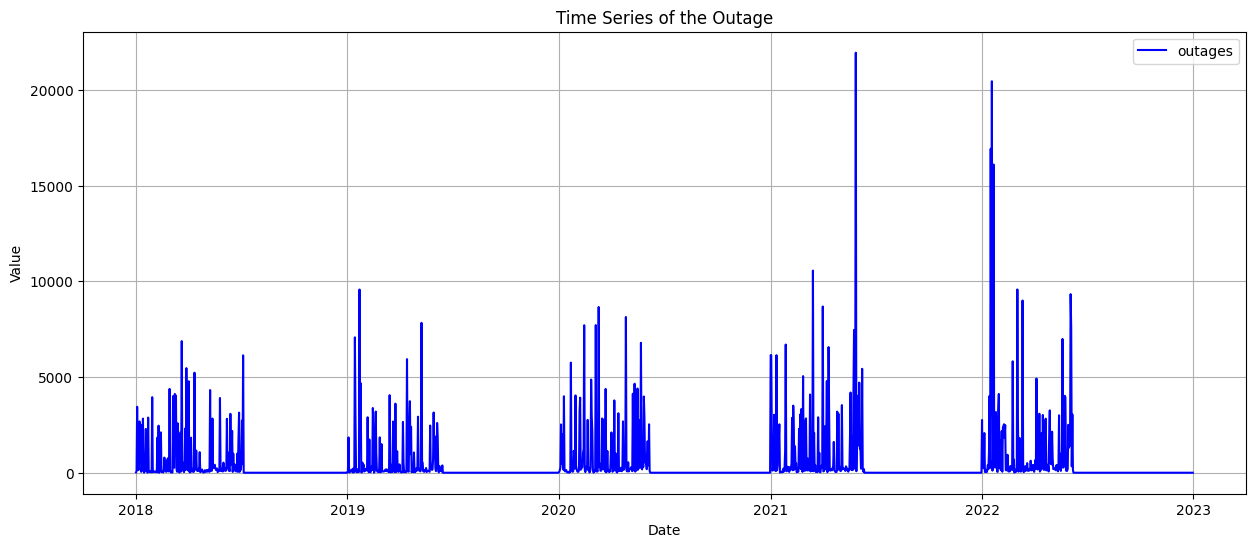

In [18]:
# Time series visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set the 'Date' column as the index of the dataframe for time series analysis
merged_df.set_index('Date', inplace=True)

# Time Series Visualization of the 'sum' variable
plt.figure(figsize=(15, 6))
plt.plot(merged_df['sum'], label='outages', color='blue')
plt.title('Time Series of the Outage')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


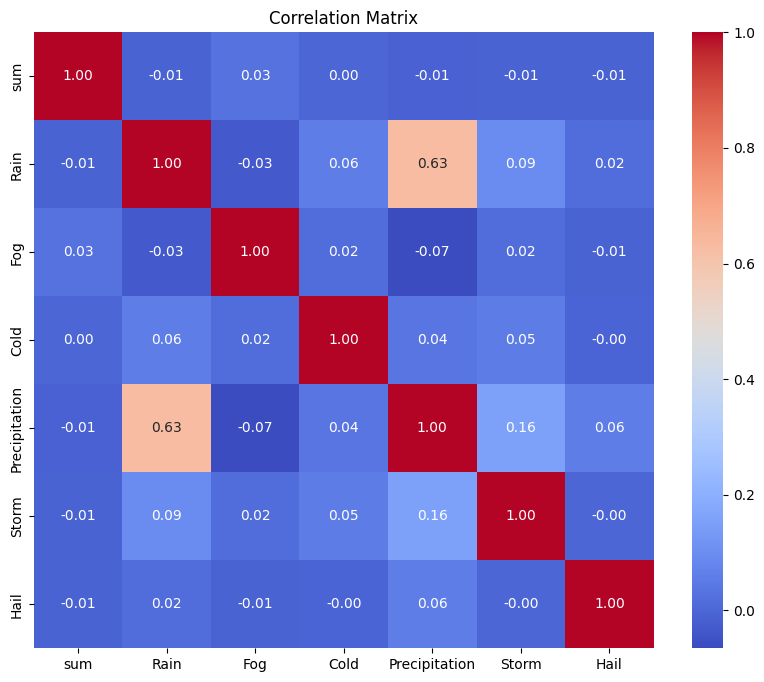

In [19]:
# Correlation analysis between ('sum') outages and weather conditions
corr_matrix = merged_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


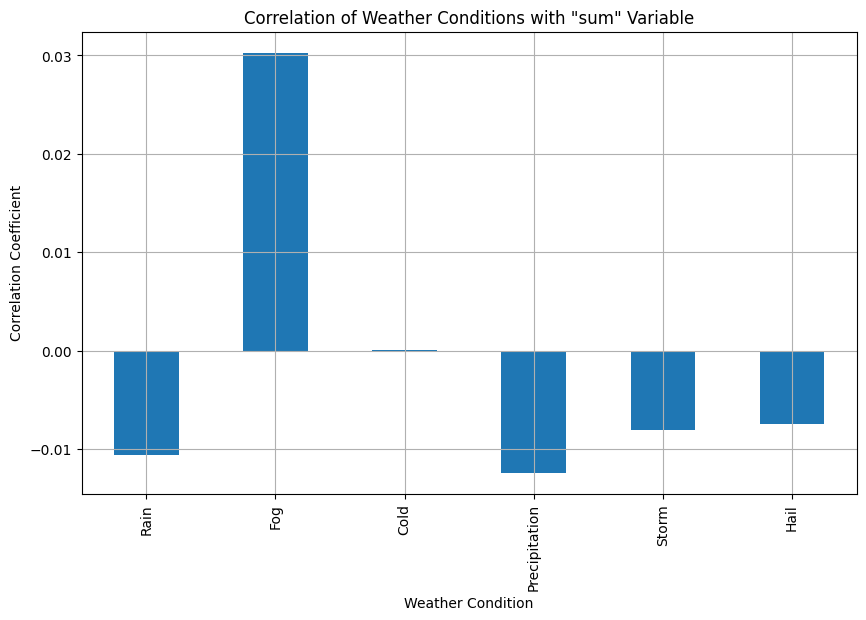

Rain            -0.010577
Fog              0.030283
Cold             0.000076
Precipitation   -0.012384
Storm           -0.008064
Hail            -0.007430
Name: sum, dtype: float64

In [20]:
# Correlation between 'sum' variable and weather conditions
correlation_with_sum = merged_df[['sum'] + weather_columns].corr()['sum']

# Plotting the correlations
plt.figure(figsize=(10, 6))
correlation_with_sum.drop('sum').plot(kind='bar')
plt.title('Correlation of Weather Conditions with "sum" Variable')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Weather Condition')
plt.grid(True)
plt.show()

correlation_with_sum.drop('sum')

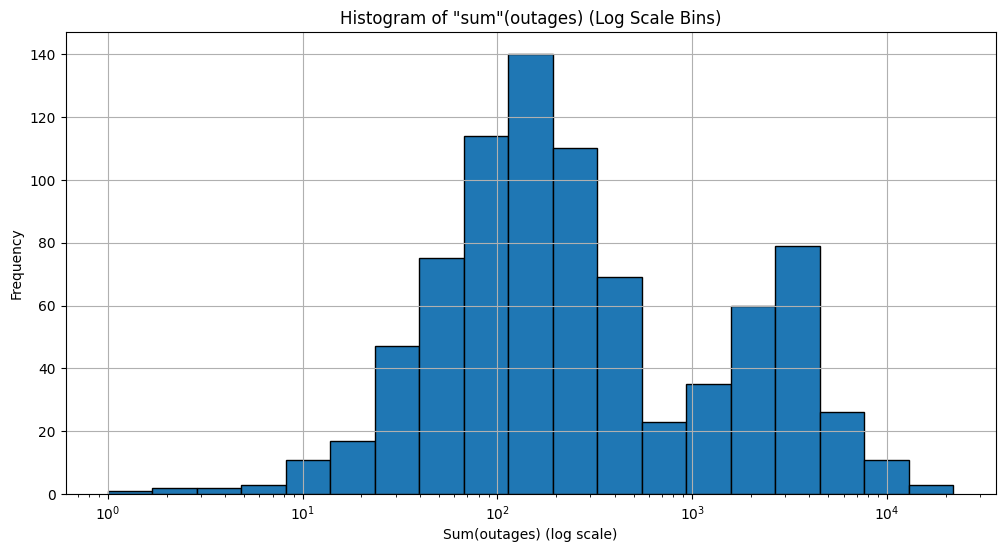

In [21]:
# Distribution analysis of outages('sum' variable)
import numpy as np

# due to the presence of the skewness and the presence of high values, using a logarithmic scale for the bins

# Excluding zero values for log-scale histogram
non_zero_sum = merged_df['sum'][merged_df['sum'] > 0]

# Defining bin edges on a logarithmic scale
bin_edges = np.logspace(np.log10(non_zero_sum.min()), np.log10(non_zero_sum.max()), 20)

# Plotting the histogram
plt.figure(figsize=(12, 6))
plt.hist(non_zero_sum, bins=bin_edges, edgecolor='black')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Histogram of "sum"(outages) (Log Scale Bins)')
plt.xlabel('Sum(outages) (log scale)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

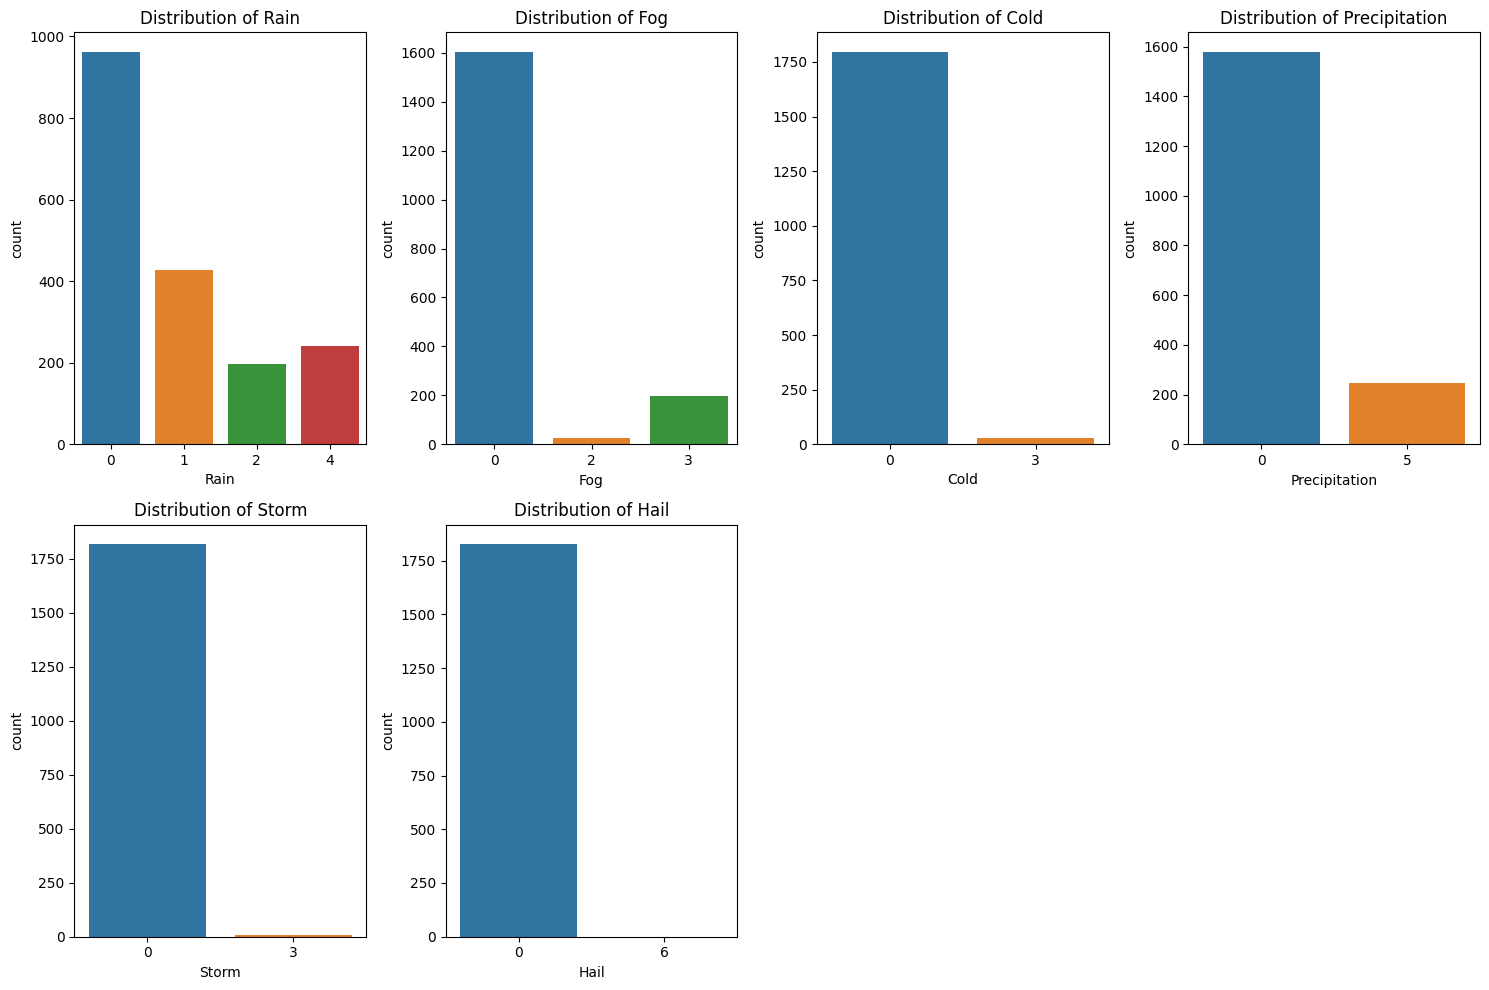

In [22]:
# Distribution analysis of the weather conditions
plt.figure(figsize=(15, 10))

# Plotting the distribution of weather conditions
weather_conditions = ['Rain', 'Fog', 'Cold', 'Precipitation', 'Storm', 'Hail']
for i, condition in enumerate(weather_conditions, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=condition, data=merged_df)
    plt.title(f'Distribution of {condition}')

plt.tight_layout()
plt.show()

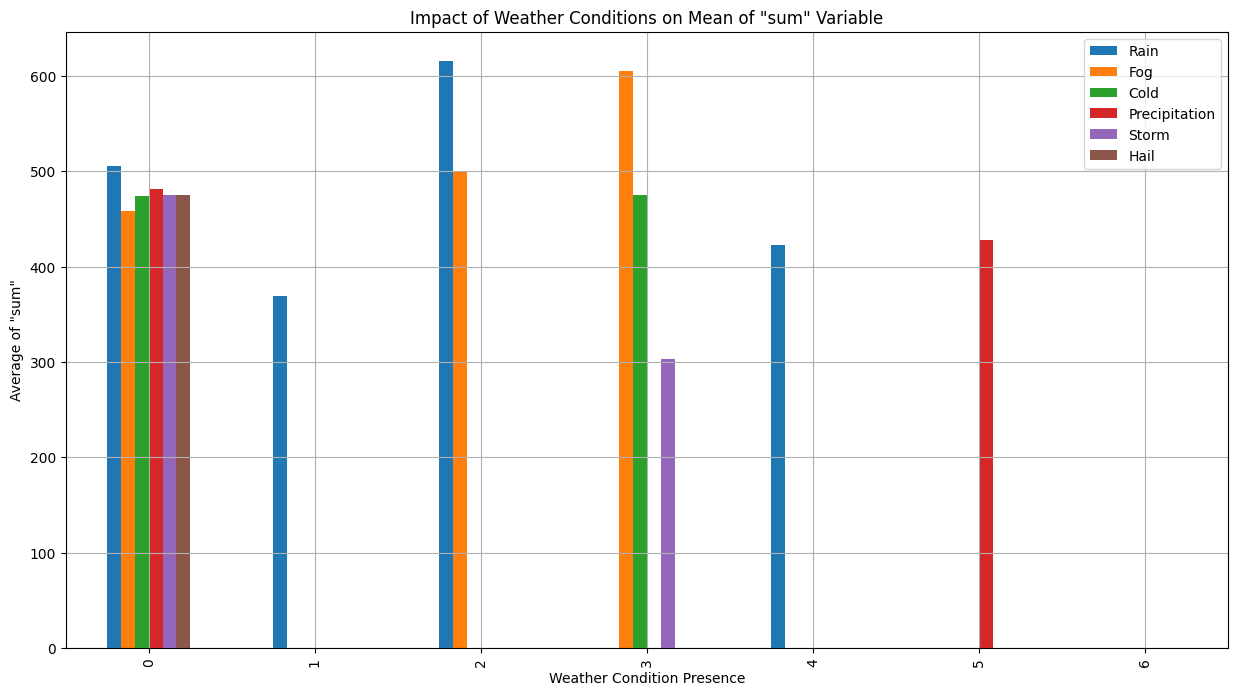

,Rain,Fog,Cold,Precipitation,Storm,Hail
0,505.189189,457.891521,474.339644,481.674478,475.202532,474.614247
1,369.170561,NaN,NaN,NaN,NaN,NaN
2,615.438776,499.708333,NaN,NaN,NaN,NaN
3,NaN,604.646465,475.233333,NaN,303.111111,NaN
4,423.116667,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,427.558704,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,0.000000


In [23]:
# Impact of weather conditions on 'sum' variability
impact_on_sum = {condition: merged_df.groupby(condition)['sum'].mean() for condition in weather_columns}

# Creating a DataFrame for easier visualization
impact_df = pd.DataFrame(impact_on_sum)

# Plotting the impact
impact_df.plot(kind='bar', figsize=(15, 8))
plt.title('Impact of Weather Conditions on Mean of "sum" Variable')
plt.xlabel('Weather Condition Presence')
plt.ylabel('Average of "sum"')
plt.grid(True)
plt.show()

impact_df

### Feature Engineering

In [24]:
# Time Series Feature Engineering

# Extracting time-based features
merged_df['Year'] = merged_df.index.year
merged_df['Month'] = merged_df.index.month
merged_df['Day'] = merged_df.index.day
merged_df['Weekday'] = merged_df.index.weekday

# Creating binary features for weekends
merged_df['Is_Weekend'] = merged_df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Rolling statistics: 7-day and 30-day rolling mean and standard deviation
merged_df['Rolling_Mean_7d'] = merged_df['sum'].rolling(window=7).mean()
merged_df['Rolling_Mean_30d'] = merged_df['sum'].rolling(window=30).mean()
merged_df['Rolling_Std_7d'] = merged_df['sum'].rolling(window=7).std()
merged_df['Rolling_Std_30d'] = merged_df['sum'].rolling(window=30).std()

# Lag features: 1-day, 7-day, and 30-day lags
merged_df['Lag_1d'] = merged_df['sum'].shift(1)
merged_df['Lag_7d'] = merged_df['sum'].shift(7)
merged_df['Lag_30d'] = merged_df['sum'].shift(30)

# Cyclical features for day and month
merged_df['Day_sin'] = np.sin(merged_df['Day'] * (2 * np.pi / 31))
merged_df['Day_cos'] = np.cos(merged_df['Day'] * (2 * np.pi / 31))
merged_df['Month_sin'] = np.sin((merged_df['Month'] - 1) * (2 * np.pi / 12))
merged_df['Month_cos'] = np.cos((merged_df['Month'] - 1) * (2 * np.pi / 12))

# Handling missing values created by rolling and lag features
merged_df.fillna(0, inplace=True)

# Displaying the augmented data
merged_df.head()


,county,state,sum,Rain,Fog,Cold,Precipitation,Storm,Hail,Year,...,Rolling_Mean_30d,Rolling_Std_7d,Rolling_Std_30d,Lag_1d,Lag_7d,Lag_30d,Day_sin,Day_cos,Month_sin,Month_cos
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,Lee,Florida,19.0,1,2,0,0,0,0,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.201299,0.979530,0.0,1.0
2018-01-02,Lee,Florida,86.0,0,0,0,0,0,0,2018,...,0.0,0.0,0.0,19.0,0.0,0.0,0.394356,0.918958,0.0,1.0
2018-01-03,Lee,Florida,3443.0,1,0,0,0,0,0,2018,...,0.0,0.0,0.0,86.0,0.0,0.0,0.571268,0.820763,0.0,1.0
2018-01-04,Lee,Florida,531.0,0,0,0,0,0,0,2018,...,0.0,0.0,0.0,3443.0,0.0,0.0,0.724793,0.688967,0.0,1.0
2018-01-05,Lee,Florida,137.0,0,2,0,0,0,0,2018,...,0.0,0.0,0.0,531.0,0.0,0.0,0.848644,0.528964,0.0,1.0


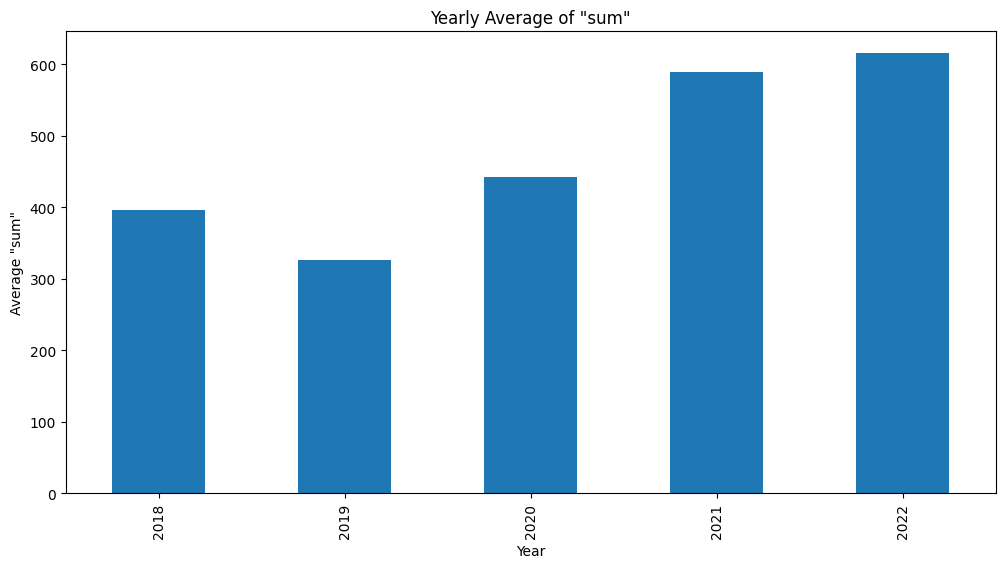

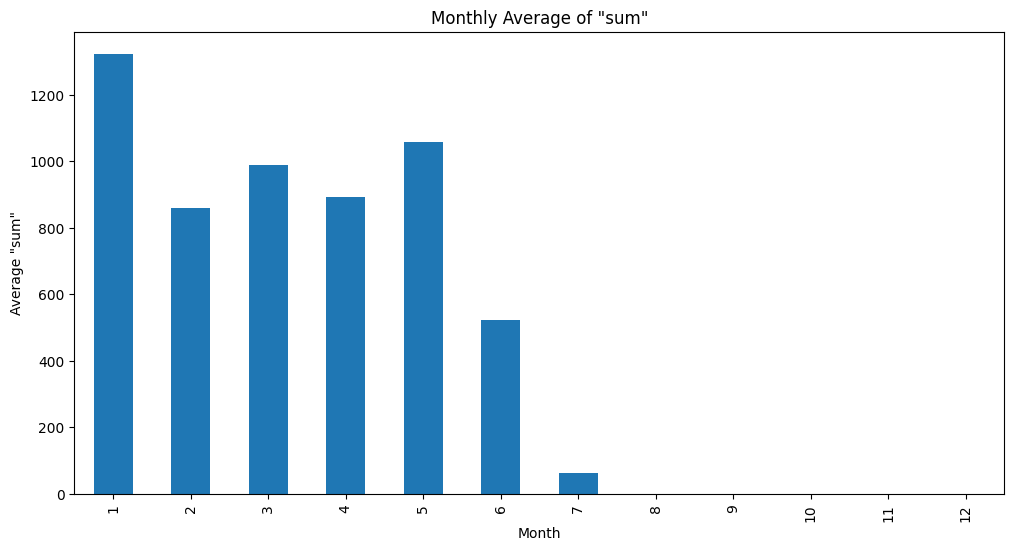

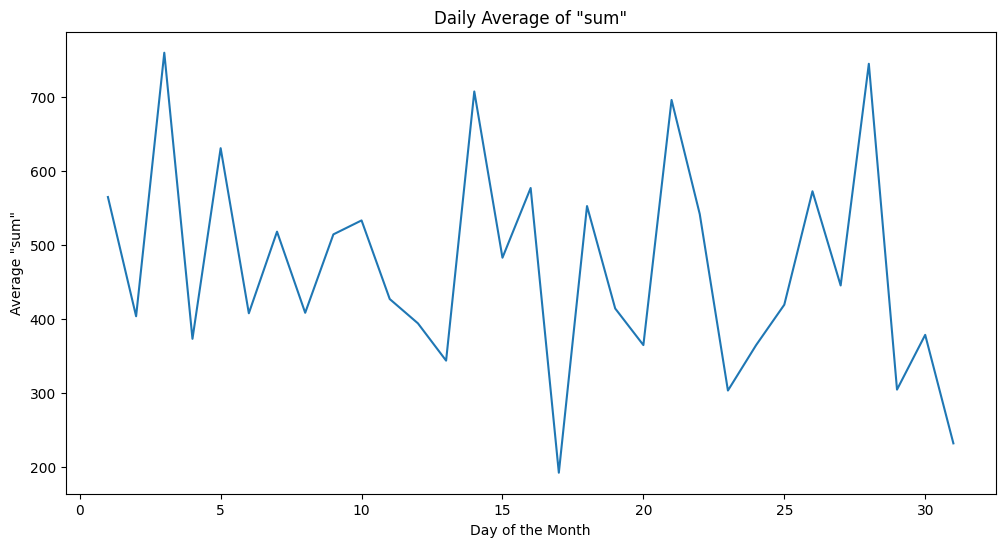

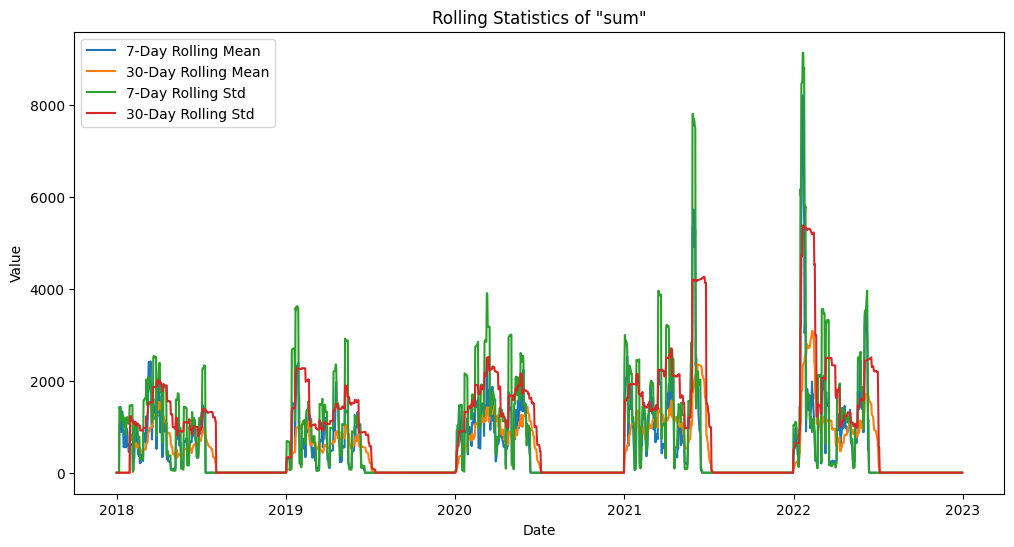

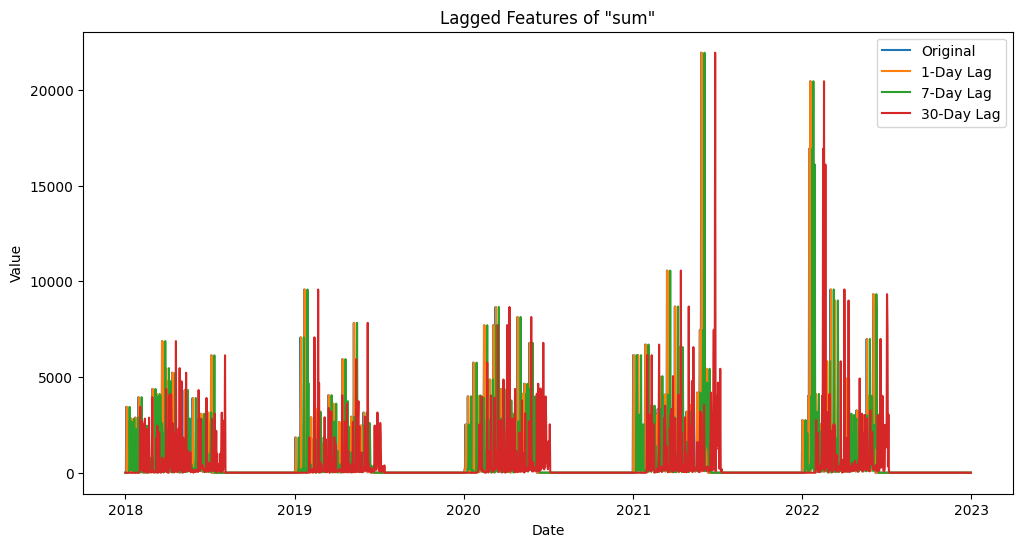

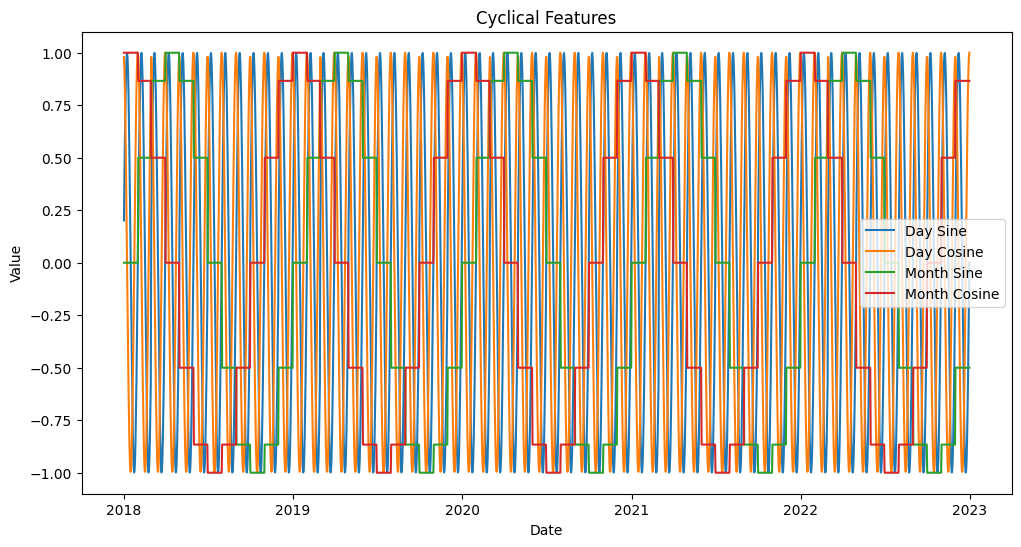

In [25]:
# Visualizing Time Series Features

# Yearly Trend
plt.figure(figsize=(12, 6))
yearly_avg = merged_df.groupby(merged_df.index.year)['sum'].mean()
yearly_avg.plot(kind='bar')
plt.title('Yearly Average of "sum"')
plt.xlabel('Year')
plt.ylabel('Average "sum"')
plt.show()

# Monthly Trend
plt.figure(figsize=(12, 6))
monthly_avg = merged_df.groupby('Month')['sum'].mean()
monthly_avg.plot(kind='bar')
plt.title('Monthly Average of "sum"')
plt.xlabel('Month')
plt.ylabel('Average "sum"')
plt.show()

# Daily Trend
plt.figure(figsize=(12, 6))
daily_avg = merged_df.groupby('Day')['sum'].mean()
daily_avg.plot()
plt.title('Daily Average of "sum"')
plt.xlabel('Day of the Month')
plt.ylabel('Average "sum"')
plt.show()


# Rolling Means and Standard Deviations
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Rolling_Mean_7d'], label='7-Day Rolling Mean')
plt.plot(merged_df['Rolling_Mean_30d'], label='30-Day Rolling Mean')
plt.plot(merged_df['Rolling_Std_7d'], label='7-Day Rolling Std')
plt.plot(merged_df['Rolling_Std_30d'], label='30-Day Rolling Std')
plt.legend()
plt.title('Rolling Statistics of "sum"')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Lagged Features
plt.figure(figsize=(12, 6))
plt.plot(merged_df['sum'], label='Original')
plt.plot(merged_df['Lag_1d'], label='1-Day Lag')
plt.plot(merged_df['Lag_7d'], label='7-Day Lag')
plt.plot(merged_df['Lag_30d'], label='30-Day Lag')
plt.legend()
plt.title('Lagged Features of "sum"')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Cyclical Features
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Day_sin'], label='Day Sine')
plt.plot(merged_df['Day_cos'], label='Day Cosine')
plt.plot(merged_df['Month_sin'], label='Month Sine')
plt.plot(merged_df['Month_cos'], label='Month Cosine')
plt.legend()
plt.title('Cyclical Features')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


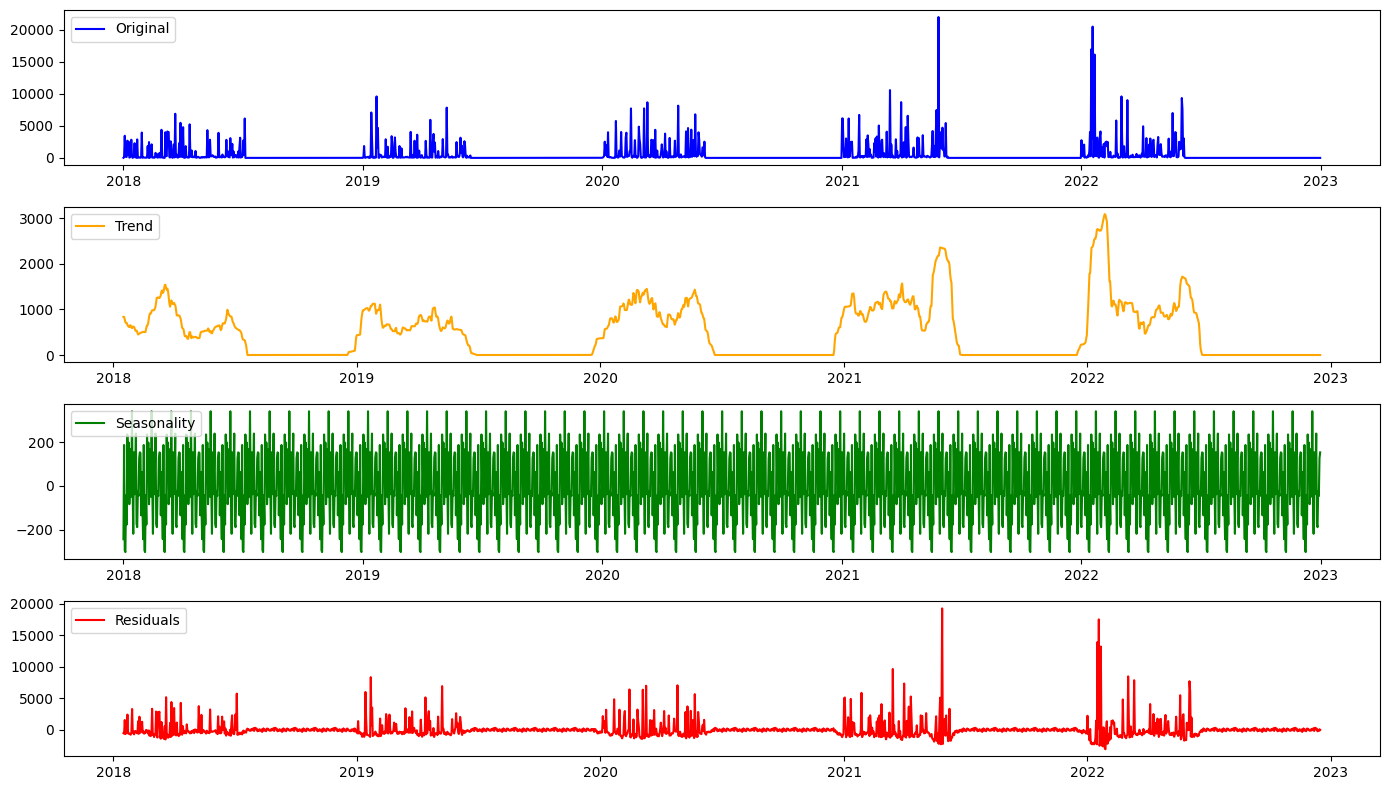

In [26]:
# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Taking monthly seasonality for seasonal decomposition
decomposition = seasonal_decompose(merged_df['sum'], model='additive', period=30)

# Extracting the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposed components
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(merged_df['sum'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

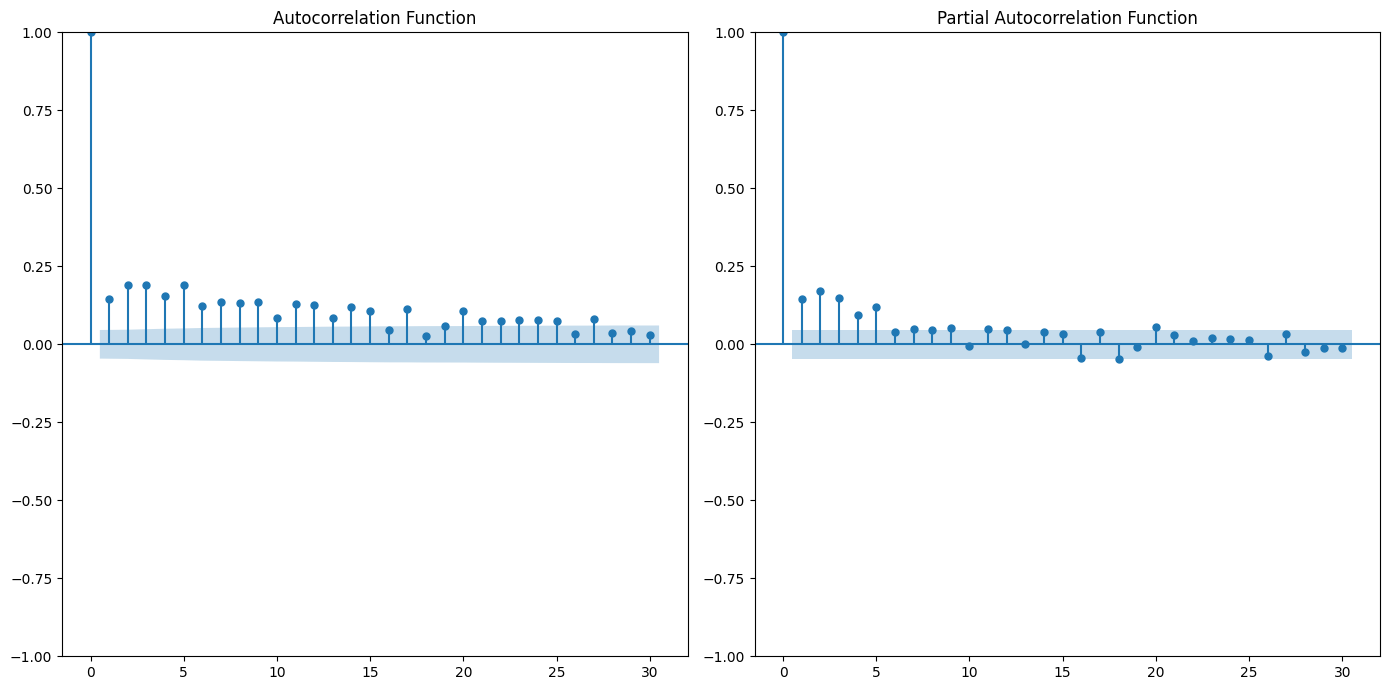

In [27]:
# Autocorrelation Analysis (ACF and PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the ACF and PACF
plt.figure(figsize=(14, 7))

plt.subplot(121)
plot_acf(merged_df['sum'], ax=plt.gca(), lags=30)
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(merged_df['sum'], ax=plt.gca(), lags=30, method='ywm')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

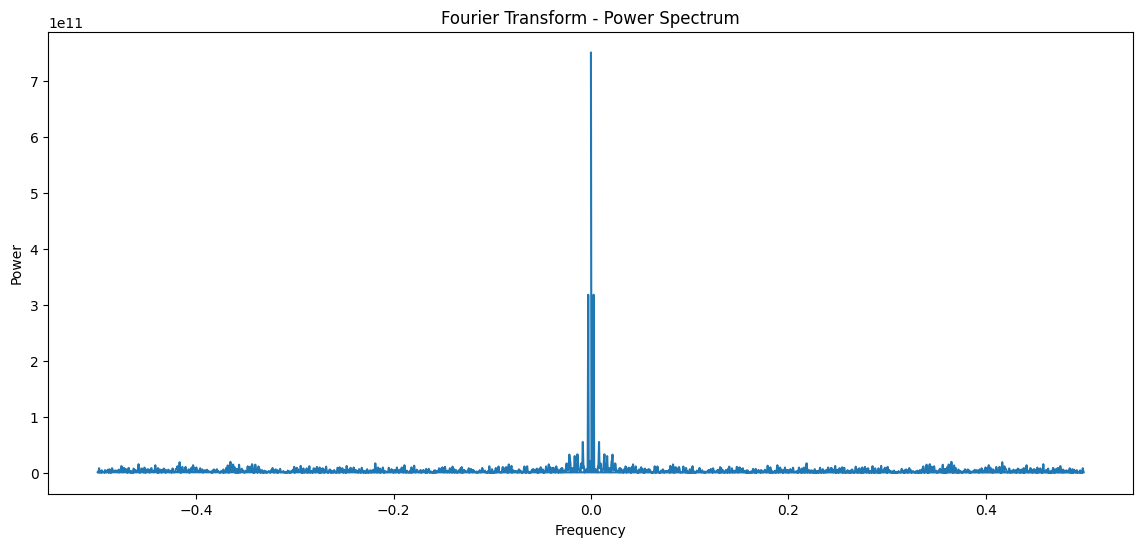

In [28]:
# Performing Fourier Transform using FFT
fft = np.fft.fft(merged_df['sum'].dropna())
frequencies = np.fft.fftfreq(len(fft))

# Getting the power spectrum (amplitude squared)
power = np.abs(fft)**2

# Plotting the Fourier Transform Spectrum
plt.figure(figsize=(14, 6))
plt.plot(frequencies, power)
plt.title('Fourier Transform - Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

##Modeling

###Train-Test Data Split

In [29]:
# Prepare the data for time series forecasting
from sklearn.model_selection import train_test_split

# Load your dataset
merged_df = pd.read_csv('merged_df.csv')
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date', inplace=True)

# train_size = int(len(y) * 0.8)
# train, test = y[0:train_size], y[train_size:len(y)]

# Prepare the dataset for linear regression
X = merged_df.drop(columns=['sum','county', 'state'], axis=1)
y = merged_df['sum']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###ARIMA

Results of Dickey-Fuller Test:
Test Statistic                -6.436403e+00
p-value                        1.648711e-08
#Lags Used                     1.900000e+01
Number of Observations Used    1.806000e+03
Critical Value (1%)           -3.433976e+00
Critical Value (5%)           -2.863142e+00
Critical Value (10%)          -2.567623e+00
dtype: float64


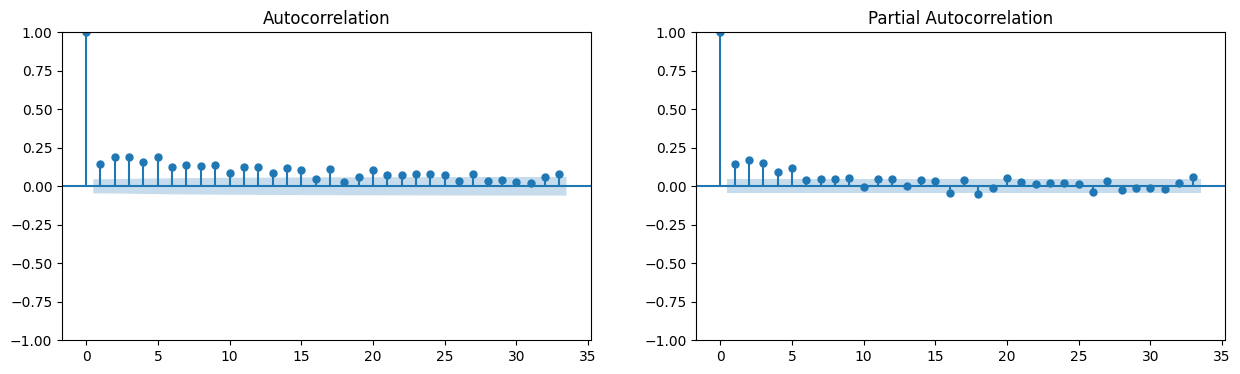

In [30]:
# Forecasting using ARIMA

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA


# Taking out Time Series column
ts = merged_df['sum']

# Checking for Stationarity
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(ts)

# Plot the ACF and PACF charts
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(ts, ax=axes[0])
plot_pacf(ts, ax=axes[1], method='ywm')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                    sum   No. Observations:                 1460
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -12772.856
Date:                Thu, 07 Dec 2023   AIC                          25553.711
Time:                        22:27:50   BIC                          25574.856
Sample:                             0   HQIC                         25561.599
                               - 1460                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        493.6527     71.741      6.881      0.000     353.043     634.263
ar.L1          0.0133      2.213      0.006      0.995      -4.324       4.351
ma.L1         -0.0287      2.226     -0.013      0.9

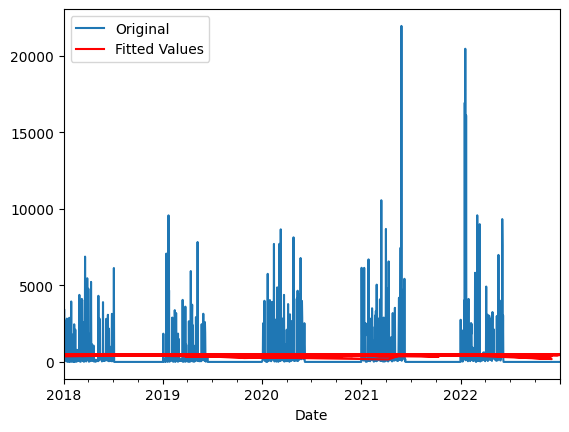

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Fitting the ARIMA model
arima_model = ARIMA(y_train, order=(1, 0, 1))
arima_result = arima_model.fit()

# Printing the summary of the fit
print(arima_result.summary())

# Plotting the original series and the fitted values
merged_df['sum'].plot(label='Original')
arima_result.fittedvalues.plot(color='red', label='Fitted Values')
plt.legend()
plt.show()


###SARIMAX

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    sum   No. Observations:                 1460
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -12776.450
Date:                Thu, 07 Dec 2023   AIC                          25558.900
Time:                        22:27:51   BIC                          25574.759
Sample:                             0   HQIC                         25564.816
                               - 1460                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.000   3061.982      0.000       0.999       1.001
ma.L1         -0.9962      0.003   -285.802      0.000      -1.003      -0.989
sigma2      2.312e+06   2.27e-10   1.02e+16      0.0

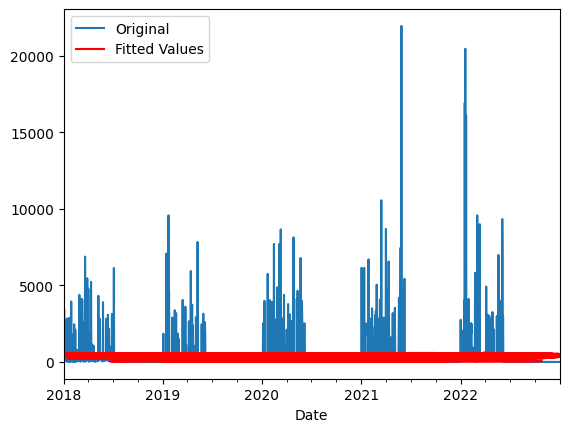

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fitting the SARIMAX Model
sarimax_model = SARIMAX(y_train, order=(1, 0, 1), seasonal_order=(0, 0, 0, 0))
sarimax_result = sarimax_model.fit()

# Printing the summary of the fit
print(sarimax_result.summary())

# Plotting the original series and the fitted values
merged_df['sum'].plot(label='Original')
sarimax_result.fittedvalues.plot(color='red', label='Fitted Values')
plt.legend()
plt.show()


###Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

# Initializing the Linear Regression model
lr_result = LinearRegression()

# fitting the model with train data
lr_result.fit(X_train, y_train)

LinearRegression()

###XGBoost

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Loading dataset
merged_df = pd.read_csv('merged_df.csv', parse_dates=['Date'], index_col='Date')

# Creating time-based features
merged_df['Year'] = merged_df.index.year
merged_df['Month'] = merged_df.index.month
merged_df['Day'] = merged_df.index.day
merged_df['DayOfWeek'] = merged_df.index.dayofweek

# Preparing the features and target
X1 = merged_df[['Year', 'Month', 'Day', 'DayOfWeek']]
y1 = merged_df['sum']

# Splitting the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initializing and fitting the XGBoost regression model
xgb_model = XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X1_train, y1_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

###ARIMAX

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Loading data
merged_df = pd.read_csv('merged_df.csv')

# Converting 'Date' to datetime and set as index
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date', inplace=True)

# Checking for stationarity of the target variable
result = adfuller(merged_df['sum'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the p-value is greater than 0.05, the series is not stationary and needs differencing.

ADF Statistic: -6.436403040534821
p-value: 1.6487109838369728e-08


In [36]:
# Prepare the dataset for linear regression
X = merged_df.drop(columns=['sum','county', 'state'], axis=1)
y = merged_df['sum']

# Split the data into training and testing sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preparing exogenous variables for training and testing
train_exog = X4_train[['Rain', 'Fog', 'Cold', 'Precipitation', 'Storm', 'Hail']]
test_exog = X4_test[['Rain', 'Fog', 'Cold', 'Precipitation', 'Storm', 'Hail']]

In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Defining ARIMA order
p = 1  # replace with your chosen value
d = 0  # replace with your chosen value if the series is not stationary
q = 1  # replace with your chosen value

# Defining exogenous variables
exog = merged_df[['Rain', 'Fog', 'Cold', 'Precipitation', 'Storm', 'Hail']]

# Fit ARIMAX model
arimax_model = ARIMA(y4_train, order=(p, d, q), exog=train_exog)
arimax_result = arimax_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

###Catboot Regressor

In [38]:
!pip install pandas catboost

In [39]:
from sklearn.model_selection import train_test_split

# Loading dataset
merged_df = pd.read_csv('merged_df.csv', parse_dates=['Date'], index_col='Date')

# Creating time-based features
merged_df['Year'] = merged_df.index.year
merged_df['Month'] = merged_df.index.month
merged_df['Day'] = merged_df.index.day
merged_df['DayOfWeek'] = merged_df.index.dayofweek

# Preparing the features and target
X = merged_df[['Year', 'Month', 'Day', 'DayOfWeek']]
y = merged_df['sum']

# Splitting the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from catboost import CatBoostRegressor

cbr_result = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE')
cbr_result.fit(X3_train, y3_train, verbose=100)

0:	learn: 1507.0693402	total: 46.8ms	remaining: 46.7s
100:	learn: 1130.1675691	total: 85.3ms	remaining: 760ms
200:	learn: 961.0491795	total: 122ms	remaining: 483ms
300:	learn: 841.1224675	total: 165ms	remaining: 382ms
400:	learn: 751.2976795	total: 209ms	remaining: 312ms
500:	learn: 679.8635138	total: 250ms	remaining: 249ms
600:	learn: 614.5899427	total: 293ms	remaining: 195ms
700:	learn: 561.7546754	total: 334ms	remaining: 142ms
800:	learn: 512.0576779	total: 403ms	remaining: 100ms
900:	learn: 467.5389513	total: 465ms	remaining: 51.1ms
999:	learn: 430.0960375	total: 539ms	remaining: 0us


###SVM

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Loading data
merged_df = pd.read_csv('merged_df.csv')

# Data preprocessing
features = merged_df[['Rain', 'Fog', 'Cold', 'Precipitation', 'Storm', 'Hail']]
target = merged_df['sum']

# Splitting the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Hyperparameter Tuning for SVR
param_grid = {
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X2_train, y2_train)

# Best parameters
best_params = grid_search.best_params_

# Re-training the model with the best parameters
svm_result = SVR(**best_params)
svm_result.fit(X2_train, y2_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


SVR(C=100)

###LSTM

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Loading data
merged_df = pd.read_csv('merged_df.csv')

# Converting 'Date' to datetime and set as index
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date', inplace=True)

# Normalizing data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(merged_df[['sum', 'Rain', 'Fog', 'Cold', 'Precipitation', 'Storm', 'Hail']])

In [43]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 1:]  # Weather conditions
        X.append(a)
        Y.append(dataset[i + look_back, 0])  # Number of outages
    return np.array(X), np.array(Y)

# Defining look_back period and prepare dataset
look_back = 3
X, Y = create_dataset(scaled_data, look_back)

In [44]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshaping input for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 6))

# Defining LSTM model
LSTM_result = Sequential()
LSTM_result.add(LSTM(50, input_shape=(look_back, 6)))
LSTM_result.add(Dense(1))
LSTM_result.compile(loss='mean_squared_error', optimizer='adam')

In [45]:
from sklearn.model_selection import train_test_split

# Spliting the data
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)

# Training the model
LSTM_result.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
1457/1457 - 11s - loss: 0.0051 - 11s/epoch - 8ms/step
Epoch 2/20
1457/1457 - 6s - loss: 0.0049 - 6s/epoch - 4ms/step
Epoch 3/20
1457/1457 - 6s - loss: 0.0048 - 6s/epoch - 4ms/step
Epoch 4/20
1457/1457 - 7s - loss: 0.0048 - 7s/epoch - 5ms/step
Epoch 5/20
1457/1457 - 5s - loss: 0.0048 - 5s/epoch - 3ms/step
Epoch 6/20
1457/1457 - 6s - loss: 0.0047 - 6s/epoch - 4ms/step
Epoch 7/20
1457/1457 - 6s - loss: 0.0047 - 6s/epoch - 4ms/step
Epoch 8/20
1457/1457 - 6s - loss: 0.0047 - 6s/epoch - 4ms/step
Epoch 9/20
1457/1457 - 7s - loss: 0.0047 - 7s/epoch - 5ms/step
Epoch 10/20
1457/1457 - 3s - loss: 0.0047 - 3s/epoch - 2ms/step
Epoch 11/20
1457/1457 - 3s - loss: 0.0047 - 3s/epoch - 2ms/step
Epoch 12/20
1457/1457 - 3s - loss: 0.0047 - 3s/epoch - 2ms/step
Epoch 13/20
1457/1457 - 4s - loss: 0.0047 - 4s/epoch - 2ms/step
Epoch 14/20
1457/1457 - 4s - loss: 0.0047 - 4s/epoch - 3ms/step
Epoch 15/20
1457/1457 - 3s - loss: 0.0047 - 3s/epoch - 2ms/step
Epoch 16/20
1457/1457 - 3s - loss: 0.0047 - 3s/

##Results

###Forecasting

In [46]:
# forecasting for test data
predictions_arima = arima_result.forecast(steps=len(X_test))
predictions_sarimax = sarimax_result.forecast(steps=len(X_test))
predictions_lr = lr_result.predict(X_test)
predictions_xgb = xgb_model.predict(X1_test)
predictions_arimax = arimax_result.predict(start=len(X4_train), end=len(X4_train) + len(X4_test) - 1, exog=test_exog)
predictions_cbr = cbr_result.predict(X3_test)
predictions_svm = svm_result.predict(X2_test)
train_predictions_lstm = LSTM_result.predict(trainX)
test_predictions_lstm = LSTM_result.predict(testX)

# Inverting predictions of LSTM
train_predictions_lstm = scaler.inverse_transform(np.concatenate((train_predictions_lstm, np.zeros((train_predictions_lstm.shape[0], 6))), axis=1))[:,0]
trainY = scaler.inverse_transform(np.concatenate((trainY.reshape(-1,1), np.zeros((trainY.shape[0], 6))), axis=1))[:,0]
test_predictions_lstm = scaler.inverse_transform(np.concatenate((test_predictions_lstm, np.zeros((test_predictions_lstm.shape[0], 6))), axis=1))[:,0]
testY = scaler.inverse_transform(np.concatenate((testY.reshape(-1,1), np.zeros((testY.shape[0], 6))), axis=1))[:,0]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


12/12 [==============================] - 0s 2ms/step


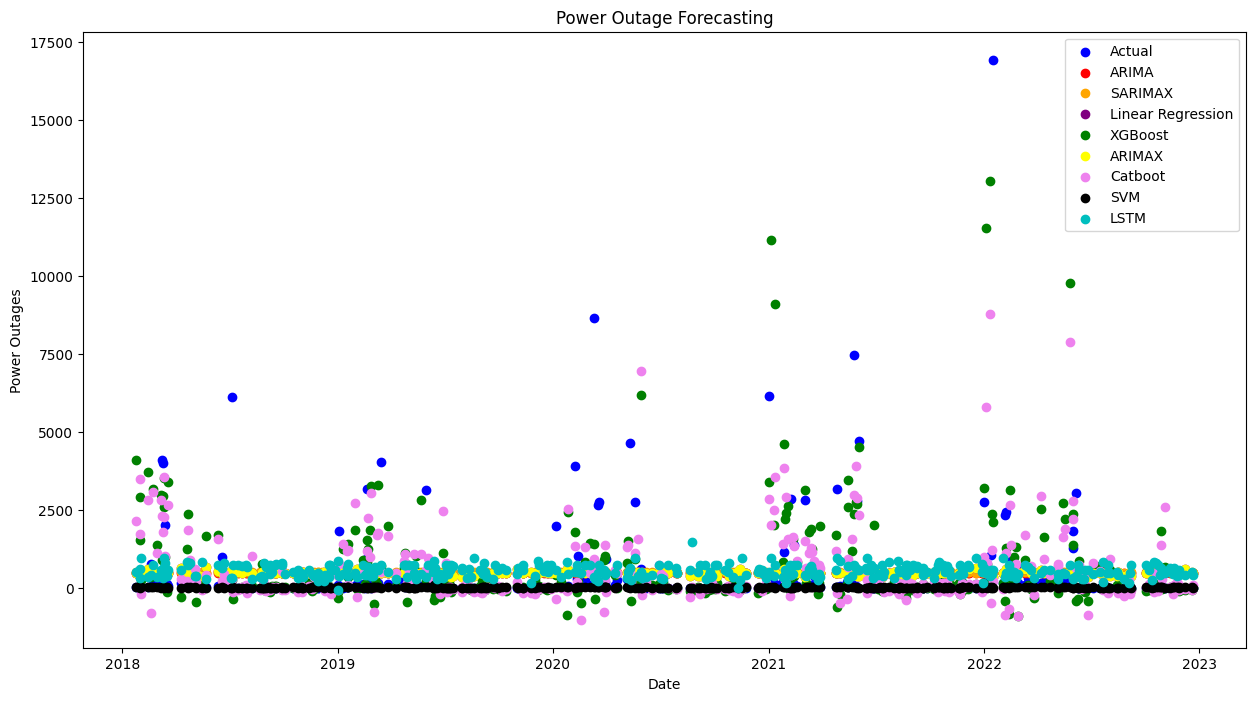

In [47]:
# Plotting the results
plt.figure(figsize=(15, 8))
plt.scatter(y_test.index, y_test, label='Actual', color='blue')
plt.scatter(y_test.index, predictions_arima, label='ARIMA', color='red')
plt.scatter(y_test.index, predictions_sarimax, label='SARIMAX', color='orange')
plt.scatter(y_test.index, predictions_lr, label='Linear Regression', color='purple')
plt.scatter(y_test.index, predictions_xgb, label='XGBoost', color='green')
plt.scatter(y_test.index, predictions_arimax, label='ARIMAX', color='yellow')
plt.scatter(y_test.index, predictions_cbr, label='Catboot', color='violet')
plt.scatter(y_test.index, predictions_svm, label='SVM', color='black')
plt.scatter(y_test.index[:-1], test_predictions_lstm, label='LSTM', color='c')


plt.title('Power Outage Forecasting')
plt.xlabel('Date')
plt.ylabel('Power Outages')
plt.legend()
plt.show()

###Evaluation

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

In [49]:
# Calculating metrics
metrics_arima = calculate_metrics(y_test, predictions_arima)
metrics_sarimax = calculate_metrics(y_test, predictions_sarimax)
metrics_lr = calculate_metrics(y_test,predictions_lr)
metrics_xgb = calculate_metrics(y1_test,predictions_xgb)
metrics_arimax = calculate_metrics(y4_test,predictions_arimax)
metrics_cbr = calculate_metrics(y3_test,predictions_cbr)
metrics_svm = calculate_metrics(y2_test,predictions_svm)
train_metrics_lstm = calculate_metrics(trainY,train_predictions_lstm)
test_metrics_lstm = calculate_metrics(testY,test_predictions_lstm)



# Printing performance metrics
print("ARIMA Metrics - RMSE: {:.2f}, MAE: {:.2f}, R²: {:.2f}".format(*metrics_arima))
print("SARIMAX Metrics - RMSE: {:.2f}, MAE: {:.2f}, R²: {:.2f}".format(*metrics_sarimax))
print("Linear Regression Metrics - RMSE: {:.2f}, MAE: {:.2f}, R²: {:.2f}".format(*metrics_lr))
print("XGBoost Metrics - RMSE: {:.2f}, MAE: {:.2f}, R²: {:.2f}".format(*metrics_xgb))
print("ARIMAX Metrics - RMSE: {:.2f}, MAE: {:.2f}, R²: {:.2f}".format(*metrics_arimax))
print("Catboot Regressor Metrics - RMSE: {:.2f}, MAE: {:.2f}, R²: {:.2f}".format(*metrics_cbr))
print("SVM metrics - RMSE: {:.2f}, MAE: {:.2f}, R²: {:.2f}".format(*metrics_svm))
print("LSTM Metrics - RMSE: {:.2f}, MAE: {:.2f}, R²: {:.2f}".format(*test_metrics_lstm))


ARIMA Metrics - RMSE: 1366.84, MAE: 684.56, R²: -0.00
SARIMAX Metrics - RMSE: 1368.61, MAE: 697.59, R²: -0.01
Linear Regression Metrics - RMSE: 1371.78, MAE: 684.92, R²: -0.01
XGBoost Metrics - RMSE: 1930.88, MAE: 834.58, R²: -1.01
ARIMAX Metrics - RMSE: 1371.78, MAE: 684.93, R²: -0.01
Catboot Regressor Metrics - RMSE: 1639.76, MAE: 768.09, R²: -0.45
SVM metrics - RMSE: 1414.74, MAE: 393.90, R²: -0.08
LSTM Metrics - RMSE: 1442.05, MAE: 688.48, R²: -0.03


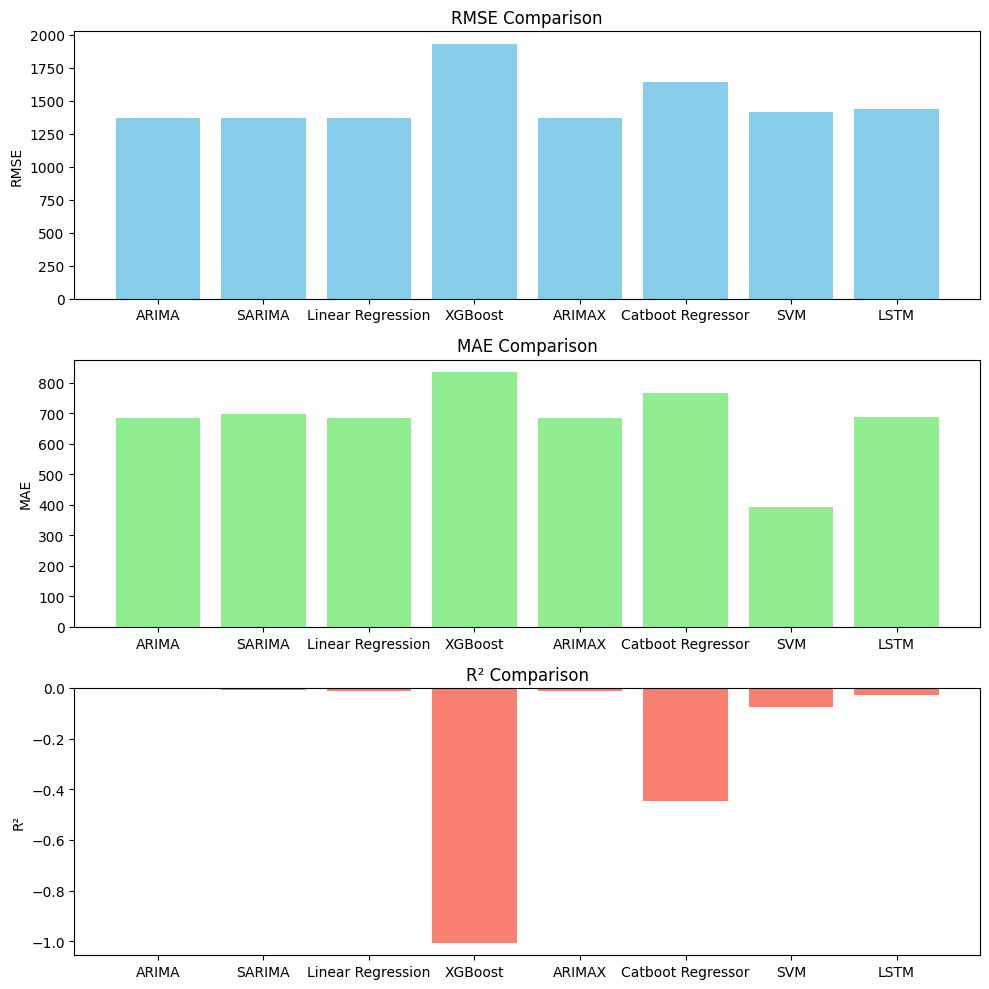

In [50]:
# Comparing all the model's metrics

# Metrics for each model
models = ['ARIMA', 'SARIMA', 'Linear Regression', 'XGBoost', 'ARIMAX', 'Catboot Regressor', 'SVM', 'LSTM']
rmse = [metrics_arima[0],metrics_sarimax[0],metrics_lr[0], metrics_xgb[0], metrics_arimax[0], metrics_cbr[0], metrics_svm[0], test_metrics_lstm[0]]
mae = [metrics_arima[1], metrics_sarimax[1], metrics_lr[1], metrics_xgb[1], metrics_arimax[1], metrics_cbr[1], metrics_svm[1], test_metrics_lstm[1]]
r2 = [metrics_arima[2], metrics_sarimax[2], metrics_lr[2], metrics_xgb[2], metrics_arimax[2], metrics_cbr[2], metrics_svm[2], test_metrics_lstm[2]]

# Plotting RMSE
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.bar(models, rmse, color='skyblue')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

# Plotting MAE
plt.subplot(3, 1, 2)
plt.bar(models, mae, color='lightgreen')
plt.title('MAE Comparison')
plt.ylabel('MAE')

# Plotting R²
plt.subplot(3, 1, 3)
plt.bar(models, r2, color='salmon')
plt.title('R² Comparison')
plt.ylabel('R²')

plt.tight_layout()
plt.show()